# Project:  Image Classification and Regression

First, make the imports

In [130]:
import matplotlib.pyplot as plt
import numpy as np
%run resources/resources.ipynb
%matplotlib inline

import keras
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential, clone_model
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping

from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Activation, MaxPooling1D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.regularizers import l2, l1
from keras.layers import MaxPooling2D
from keras.layers import Input
from keras.layers import UpSampling2D
from keras import Model

from tensorflow.test import is_gpu_available
print("GPU is available" if is_gpu_available() else "GPU is not available")

GPU is not available


Test the drawing functions

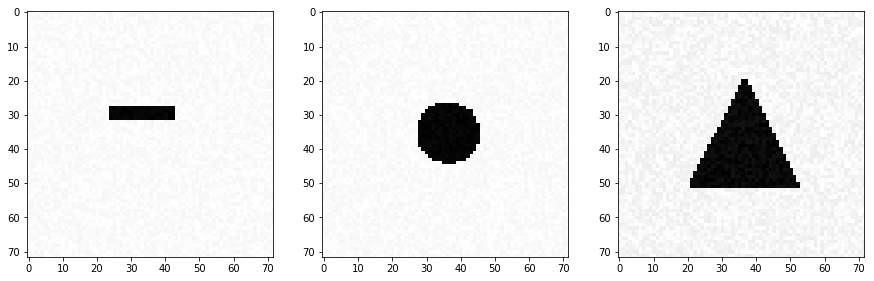

In [2]:
plt.figure(figsize=(15,15))

plt.subplot(131)
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(132)
im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(133)
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.show()

Set train and test sets

In [29]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = to_categorical(Y_train, 3)
[X_test, Y_test] = generate_dataset_classification(200, 20)
Y_test = to_categorical(Y_test, 3)

Creating data:
0
50
100
150
200
250
300
Creating data:
0
50
100
150
200


Create the network

In [35]:
nb_neurons = 50

model = Sequential([
    Dense(nb_neurons, input_shape=(5184,), activation='relu'), 
    Dense(3, activation='softmax')])

sgd = optimizers.SGD(lr = 0.001, 
         decay=1e-6, momentum=0.9, 
         nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

__Remark__

A very simple network is really enough for this simple problem : 2 dense layers.

Next, train the network

In [36]:
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 1.0499 - acc: 0.4867
Epoch 2/50
300/300 [==============================] - 0s 234us/step - loss: 0.7103 - acc: 0.6333
Epoch 3/50
300/300 [==============================] - 0s 223us/step - loss: 0.4898 - acc: 0.7900
Epoch 4/50
300/300 [==============================] - 0s 210us/step - loss: 0.3980 - acc: 0.8900
Epoch 5/50
300/300 [==============================] - 0s 230us/step - loss: 0.3408 - acc: 0.8800
Epoch 6/50
300/300 [==============================] - 0s 307us/step - loss: 0.3015 - acc: 0.9133
Epoch 7/50
300/300 [==============================] - 0s 218us/step - loss: 0.2693 - acc: 0.9267
Epoch 8/50
300/300 [==============================] - 0s 344us/step - loss: 0.2364 - acc: 0.9600
Epoch 9/50
300/300 [==============================] - 0s 299us/step - loss: 0.2135 - acc: 0.9533
Epoch 10/50
300/300 [==============================] - 0s 322us/step - loss: 0.2205 - acc: 0.9467
Epoch 11/50
300/300 [==========

In [37]:
c = 0
for k in range(len(Y_test)):
    x_t = X_test[k]
    x_t = x_t.reshape(1, x_t.shape[0])
    res_test = model.predict(x_t)
    res_t = np.argmax(res_test)
    if res_t == np.argmax(Y_test[k]):
        c += 1

print("Accuracy on test set : " + str(c/len(Y_test)))

Accuracy on test set : 1.0


__Remark__

The accuracy on test set is close to 1, which is not bad. 

Print the layers

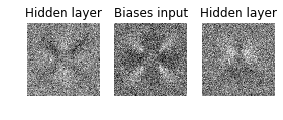

In [39]:
weights = model.get_weights()
image = weights[0] @ weights[2]
n_layers = len(weights)
titles = ["Hidden layer", "Biases input", "Hidden layer"]

for k in range(3):
    plt.subplot(1, n_layers, k + 1)
    plt.imshow(image[:, k].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title(titles[k])
    plt.axis("off")

plt.show()

## More difficult classification problem

Create train and test sets

In [40]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)
Y_train = np_utils.to_categorical(Y_train, 3)
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 3)

[X_test, Y_test] = generate_test_set_classification()
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 3)

Creating data:
0
50
100
150
200
250
300
350
400
450
500
550
600
Creating data:
0
50
100
150
200
250
300


Set the network

In [99]:
model = Sequential([
    Conv2D(64, (5,5), input_shape=(IMAGE_SIZE,IMAGE_SIZE, 1), activation='relu'), # Convolutional
    MaxPooling2D(pool_size=(3, 3)), # Pooling
    Conv2D(32, (5,5), input_shape=(IMAGE_SIZE,IMAGE_SIZE, 1), activation='relu'), # Convolutional
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3)]) # FullyConnected

sgd = optimizers.SGD(lr = 0.001, 
         decay=1e-6, momentum=0.9, 
         nesterov=True)

model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 68, 68, 64)        1664      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 18, 18, 32)        51232     
_________________________________________________________________
flatten_22 (Flatten)         (None, 10368)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 16)                165904    
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 51        
Total params: 218,851
Trainable params: 218,851
Non-trainable params: 0
_________________________________________________________________


__Remark__

A simple network like the previous one is not enough. The results might be correct, but not really above 70%. If we add 2 convolutional layers, we can have a better result, even if it should be possible to do a much better job.

Train the network

In [100]:
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
600/600 [==============================] - 4s 7ms/step - loss: 0.3332 - acc: 0.3433
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3020 - acc: 0.3133
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.2705 - acc: 0.3267
Epoch 4/100
600/600 [==============================] - 3s 6ms/step - loss: 0.2540 - acc: 0.3267
Epoch 5/100
600/600 [==============================] - 3s 6ms/step - loss: 0.2418 - acc: 0.3267
Epoch 6/100
600/600 [==============================] - 3s 4ms/step - loss: 0.2337 - acc: 0.3317
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2285 - acc: 0.3867
Epoch 8/100
600/600 [==============================] - 3s 4ms/step - loss: 0.2237 - acc: 0.3467
Epoch 9/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2192 - acc: 0.4617
Epoch 10/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2179 - acc: 0.4200
Epoch 11/100
600/600 [=================

600/600 [==============================] - 3s 5ms/step - loss: 0.0713 - acc: 0.9000
Epoch 86/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0701 - acc: 0.9000
Epoch 87/100
600/600 [==============================] - 3s 6ms/step - loss: 0.0694 - acc: 0.9050
Epoch 88/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0737 - acc: 0.8950
Epoch 89/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0685 - acc: 0.9017
Epoch 90/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0648 - acc: 0.9150
Epoch 91/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0707 - acc: 0.9017
Epoch 92/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0679 - acc: 0.9150
Epoch 93/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0635 - acc: 0.9133
Epoch 94/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0690 - acc: 0.9133
Epoch 95/100
600/600 [=====================

In [101]:
c = 0
for k in range(len(Y_test)):
    x_t = X_test[k]
    x_t = x_t.reshape(1, x_t.shape[0], x_t.shape[1], x_t.shape[2])
    res_test = model.predict(x_t)
    res_t = np.argmax(res_test)
    if res_t == np.argmax(Y_test[k]):
        c += 1

print("Accuracy on test set : " + str(c/len(Y_test)))

Accuracy on test set : 0.8833333333333333


In [102]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 3ms/step


[0.07945885439713796, 0.8833333325386047]

# Regression problem

Set train and test sets.

In [150]:
[X_train, Y_train] = generate_dataset_regression(1000, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200


Sort vertices by coordinate. It's not very good but others ways, such as center distance do not give much better results.

In [151]:
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 3, 2)

for i in range(len(Y_train)):
    Y_train[i] = Y_train[i][np.argsort(np.sum(Y_train[i], axis=1)), :]

Y_train = np.array([Y_train[i].ravel() for i in range(len(Y_train))])
Y_train = Y_train.reshape(Y_train.shape[0], 6)

See an example of train/test.

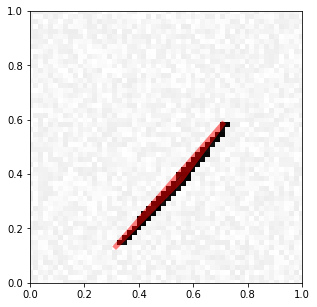

In [152]:
visualize_prediction(X_train[0], Y_train[0])

Normalize

In [153]:
mean = 0.5
var = 0.5
Y_train = Y_train - mean
Y_train = Y_train / var

In [154]:
model_reg = Sequential()
model_reg.add(Conv2D(64, (5,5), activation='relu', padding='same', input_shape=(72,72,1))),#, kernel_regularizer=l2(reg), padding="same"))
model_reg.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_reg.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_reg.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_reg.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_reg.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_reg.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_reg.add(Flatten())
model_reg.add(Dense(128, activation='relu'))
model_reg.add(Dense(64, activation='relu'))
model_reg.add(Dense(32, activation='relu'))
model_reg.add(Dense(6))

model_reg.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 72, 72, 64)        1664      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 9, 9, 64)          36928     
__________

__Remark__

It is mandatory to use a more complidated network than the previous ones, with a higher number of parmaeters. Using Conv2D and MaxPooling layers, and then some dense layers, we get a decent result.

It's correct on average, but there are still some bad cases.

In [157]:
model_reg.fit(X_train, Y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/100
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0352
Epoch 2/100
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0323
Epoch 3/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0311
Epoch 4/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0017 - mean_absolute_error: 0.0318
Epoch 5/100
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0013 - mean_absolute_error: 0.0281
Epoch 6/100
1000/1000 [==============================] - 9s 9ms/step - loss: 8.8539e-04 - mean_absolute_error: 0.0228
Epoch 7/100
1000/1000 [==============================] - 9s 9ms/step - loss: 7.7027e-04 - mean_absolute_error: 0.0213
Epoch 8/100
1000/1000 [==============================] - 9s 9ms/step - loss: 5.6467e-04 - mean_absolute_error: 0.0182
Epoch 9/100
1000/1000 [==============================] - 9s 9ms/step - loss:

1000/1000 [==============================] - 7s 7ms/step - loss: 5.5391e-04 - mean_absolute_error: 0.0182
Epoch 71/100
1000/1000 [==============================] - 7s 7ms/step - loss: 5.0169e-04 - mean_absolute_error: 0.0170
Epoch 72/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0329
Epoch 73/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0388
Epoch 74/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0654
Epoch 75/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0723
Epoch 76/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0946
Epoch 77/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0754
Epoch 78/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0042 

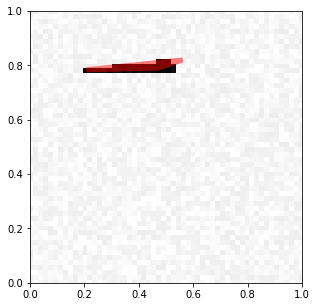

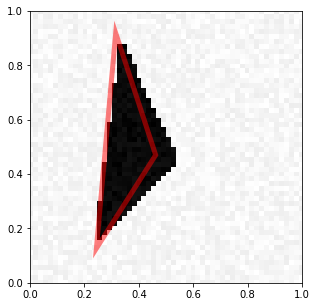

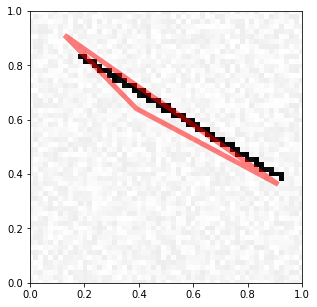

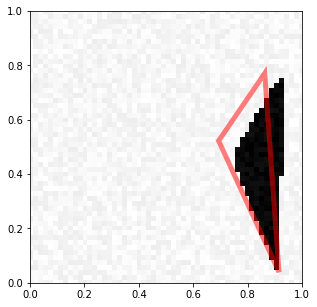

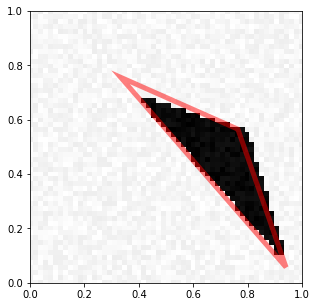

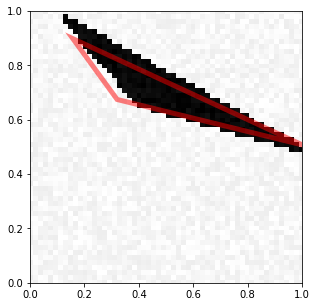

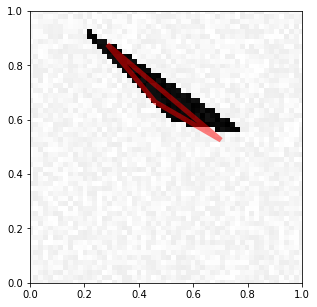

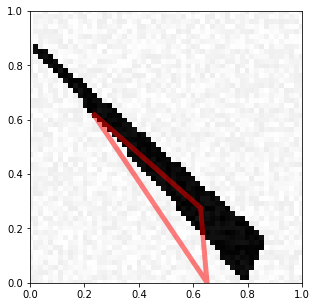

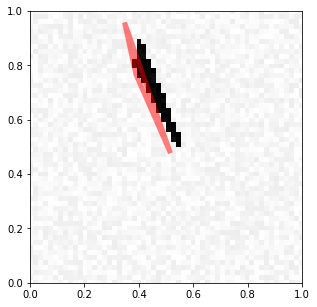

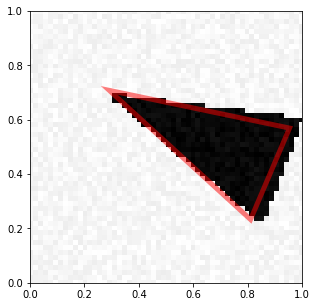

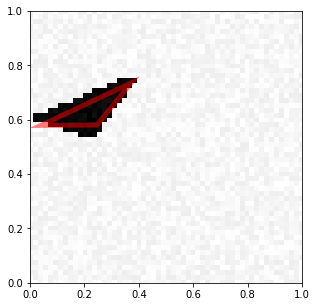

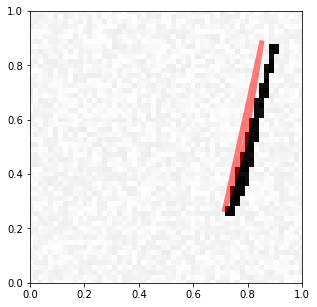

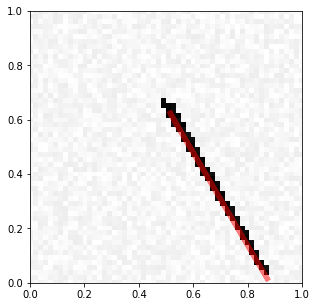

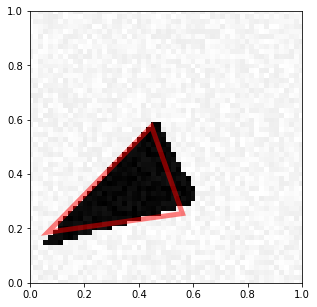

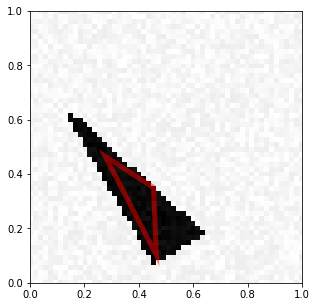

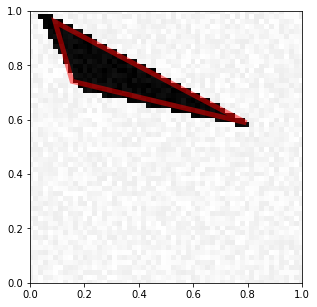

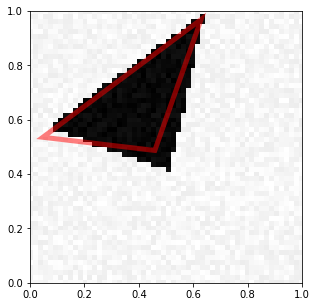

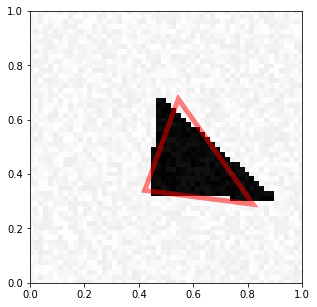

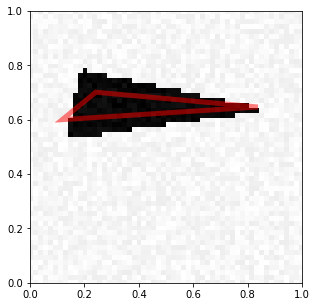

In [158]:
Y_res = model_reg.predict(X_test)
for i in range(1,20):
    visualize_prediction(X_test[i], Y_res[i]*var + mean)

__Remark__

The result is not bad except in some particular cases.

# Image denoising

Set train and test sets.

In [122]:
[X_train, Y_train] = generate_dataset_regression_noise(300, 20)
[X_test, Y_test] = generate_dataset_regression_noise(300, 20)

X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
Y_train = Y_train.reshape(Y_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')

Creating data:
0
100
200
300
Creating data:
0
100
200
300


Print train sample. 

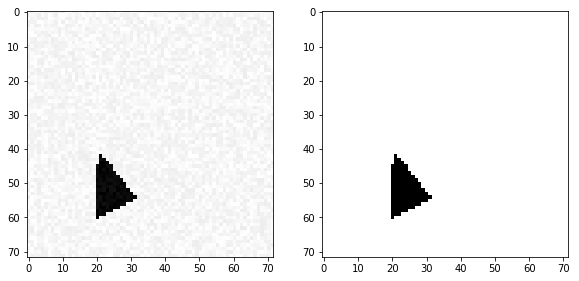

In [126]:
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.imshow(X_train[0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.subplot(132)
plt.imshow(Y_train[0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

Create architecture

In [132]:
inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

conv1a = Conv2D(64, 3, activation = 'relu', padding='same')(inputs)
conv1b = Conv2D(64, 3, activation = 'relu', padding='same')(conv1a)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)
conv2a = Conv2D(128, 3, activation = 'relu', padding='same')(pool1)
conv2b = Conv2D(128, 3, activation = 'relu', padding='same')(conv2a)
pool2 = MaxPooling2D(pool_size=(1, 1))(conv2b)

up5 = UpSampling2D(size = (2,2))(pool2)
up_conv5 = Conv2D(64, 2, activation = 'relu', padding='same')(up5)
conv5b = Conv2D(64, 3, activation = 'relu', padding='same')(up_conv5)
conv5c = Conv2D(64, 3, activation = 'relu', padding='same')(conv5b)

conv6 = Conv2D(1, 1, activation = 'relu')(conv5c)

model_noise = Model(input = inputs, output = conv6)
#model_noise.compile(optimizer = 'adam', loss = 'categorical_crossentropy')
model_noise.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_noise.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 72, 72, 64)        640       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 36, 36, 128)       73856     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 36, 36, 128)       147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 36, 36, 128)       0         
__________

/home/bricout/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train the network

In [133]:
model_noise.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
300/300 [==============================] - 16s 54ms/step - loss: 0.3149
Epoch 2/20
300/300 [==============================] - 15s 50ms/step - loss: 0.0663
Epoch 3/20
300/300 [==============================] - 16s 53ms/step - loss: 0.0197
Epoch 4/20
300/300 [==============================] - 15s 51ms/step - loss: 0.0083
Epoch 5/20
300/300 [==============================] - 15s 52ms/step - loss: 0.0043
Epoch 6/20
300/300 [==============================] - 16s 53ms/step - loss: 0.0027
Epoch 7/20
300/300 [==============================] - 17s 56ms/step - loss: 0.0020
Epoch 8/20
300/300 [==============================] - 16s 55ms/step - loss: 0.0016
Epoch 9/20
300/300 [==============================] - 17s 57ms/step - loss: 0.0012
Epoch 10/20
300/300 [==============================] - 18s 59ms/step - loss: 9.7644e-04
Epoch 11/20
300/300 [==============================] - 18s 59ms/step - loss: 7.9454e-04
Epoch 12/20
300/300 [==============================] - 17s 55ms/step - loss: 

In [134]:
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
Y_res = model_noise.predict(X_test)

In [135]:
a = 2

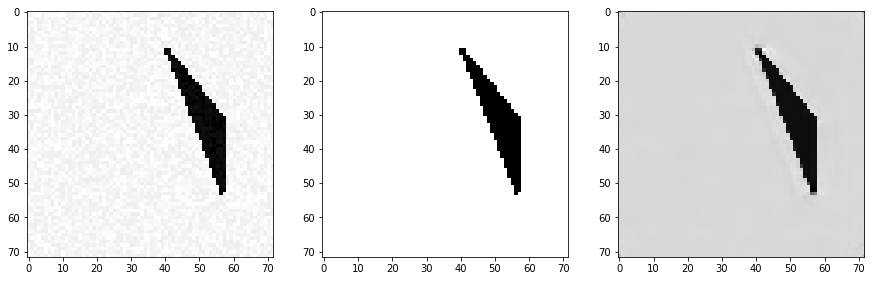

In [137]:
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.imshow(X_test[a].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.subplot(132)
plt.imshow(Y_test[a].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.subplot(133)
plt.imshow(Y_res [a].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

In [146]:
print(Y_res[a,0,:,0])
print(Y_test[a])

[0.82009566 0.9477402  0.94670737 0.9503495  0.941905   0.93981045
 0.9386192  0.9388771  0.93893236 0.9381377  0.9363201  0.9337989
 0.9316626  0.93111503 0.93169403 0.9323469  0.9330979  0.9336102
 0.9335822  0.9342856  0.9362216  0.93879026 0.94017786 0.9395311
 0.93811995 0.93672395 0.935905   0.93582296 0.9362641  0.93649465
 0.9358045  0.9339707  0.9317886  0.9313172  0.93266964 0.9340397
 0.93470967 0.9349293  0.9355742  0.9370444  0.9381026  0.9378124
 0.93641764 0.9344967  0.93282515 0.93226504 0.9331086  0.9351734
 0.93718106 0.9375174  0.93641686 0.9351833  0.93485093 0.9351686
 0.93532175 0.93476963 0.9335933  0.93167263 0.92962605 0.92957836
 0.93179977 0.93533313 0.9383024  0.9408998  0.94274974 0.9426204
 0.94068986 0.93357855 0.94370455 0.92636985 0.9527921  0.7687745 ]
[0.93220339 0.93220339 0.93220339 ... 0.93220339 0.93220339 0.93220339]


Remark: the image is denoised but the final image is not convincing because of the grey colormap. Indeed, there is still some variations in the resulting image and the background is thus grey.